**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [86]:
import numpy as np
import pandas as pd

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [87]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 77.1MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [88]:
df = pd.read_csv('nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [90]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [91]:
df.head()

Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  

[5 rows x 21 columns]

Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [92]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

**What is the shape of the dataframe now?**

In [94]:
print(f'Shape of the dataframe post dropping rows with NaN values is: {df.shape}')

Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [95]:
x = df.drop(['Name','TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

In [96]:
print(f'The shape of the features dataframe is: {x.shape}')
print(f'The shape of the labels dataframe is: {y.shape}')

The shape of the features dataframe is: (1329, 19)
The shape of the labels dataframe is: (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [97]:
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
print(f'The shape of training features dataframe is: {x_train.shape}')
print(f'The shape of testing features dataframe is: {x_test.shape}')
print(f'The shape of training labels dataframe is: {y_train.shape}')
print(f'The shape of testing labels dataframe is: {y_test.shape}')
print(f'The train-to-test split ratio is: {x_train.shape[0]/x_test.shape[0]}')

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of testing labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [100]:
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [101]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy: ratio of correctly predicted observations to the total observations
- F1 score: harmonic mean of Precision and Recall (balances the trade-off between them)
- Precision: ratio of correctly predicted positive observations to the total predicted positives
- Recall: ratio of correctly predicted positive observations to all actual positives

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [102]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [103]:
y_pred = lr.predict(x_test)
print(f'Accuracy of the model is: {accuracy_score(y_test, y_pred)}')
print(f'F1 score of the model is: {f1_score(y_test, y_pred)}')
print(f'Precision of the model is: {precision_score(y_test, y_pred)}')
print(f'Recall of the model is: {recall_score(y_test, y_pred)}')

Accuracy of the model is: 0.7368421052631579
F1 score of the model is: 0.8055555555555556
Precision of the model is: 0.7880434782608695
Recall of the model is: 0.8238636363636364


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [104]:
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [105]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [106]:
y_pred1 = svm.predict(x_test)
print(f'Accuracy of the model is: {accuracy_score(y_test, y_pred1)}')
print(f'F1 score of the model is: {f1_score(y_test, y_pred1)}')
print(f'Precision of the model is: {precision_score(y_test, y_pred1)}')
print(f'Recall of the model is: {recall_score(y_test, y_pred1)}')

Accuracy of the model is: 0.7443609022556391
F1 score of the model is: 0.8131868131868132
Precision of the model is: 0.7872340425531915
Recall of the model is: 0.8409090909090909


### MULTICLASS CLASSIFICATION

In [107]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 70.9MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [108]:
df_multi = pd.read_csv('social_well_being.csv')

**Always analyse the data.**

In [109]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [110]:
df_multi.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [111]:
df_multi.head()

User_ID  Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0        1   25      Female  Instagram                         120   
1        2   30        Male    Twitter                          90   
2        3   22  Non-binary   Facebook                          60   
3        4   28      Female  Instagram                         200   
4        5   33        Male   LinkedIn                          45   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0              3                      45                         10   
1              5                      20                         25   
2              2                      15                          5   
3              8                     100                         30   
4              1                       5                          2   

   Messages_Sent_Per_Day Dominant_Emotion  
0                     12        Happiness  
1                     30            Anger  
2                     20          Neutral  
3                     50          Anxiety  
4                     10          Boredom

Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [112]:
print(f"The classes are: {df_multi['Dominant_Emotion'].unique()}")

The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [113]:
print(f"The genders are: {df_multi['Gender'].unique()}")
print(f"The platforms used are: {df_multi['Platform'].unique()}")

The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [114]:
from sklearn.preprocessing import OneHotEncoder

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [115]:
gender_encoder = OneHotEncoder(sparse_output = False)
gender_encoded = gender_encoder.fit_transform(df_multi[['Gender']])
gender_columns = gender_encoder.get_feature_names_out(['Gender'])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=gender_columns)
df_multi = pd.concat([df_multi, gender_encoded_df], axis=1)
df_multi.drop('Gender', axis=1, inplace=True)

In [116]:
df_multi

User_ID  Age   Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25  Instagram                         120              3   
1          2   30    Twitter                          90              5   
2          3   22   Facebook                          60              2   
3          4   28  Instagram                         200              8   
4          5   33   LinkedIn                          45              1   
..       ...  ...        ...                         ...            ...   
919      996   33    Twitter                          85              4   
920      997   22   Facebook                          70              1   
921      998   35   Whatsapp                         110              3   
922      999   28   Telegram                          60              2   
923     1000   27   Snapchat                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                        45                         10                     12   
1                        20                         25                     30   
2                        15                          5                     20   
3                       100                         30                     50   
4                         5                          2                     10   
..                      ...                        ...                    ...   
919                      35                         18                     18   
920                      14                          6                     10   
921                      50                         25                     25   
922                      18                          8                     18   
923                      40                         18                     22   

    Dominant_Emotion  Gender_Female  Gender_Male  Gender_Non-binary  
0          Happiness            1.0          0.0                0.0  
1              Anger            0.0          1.0                0.0  
2            Neutral            0.0          0.0                1.0  
3            Anxiety            1.0          0.0                0.0  
4            Boredom            0.0          1.0                0.0  
..               ...            ...          ...                ...  
919          Boredom            0.0          0.0                1.0  
920          Neutral            1.0          0.0                0.0  
921        Happiness            0.0          1.0                0.0  
922            Anger            0.0          0.0                1.0  
923          Neutral            1.0          0.0                0.0  

[924 rows x 12 columns]

**Repeat the drill for the column 'Platform'.**

In [117]:
platform_encoder = OneHotEncoder(sparse_output = False)
platform_encoded = platform_encoder.fit_transform(df_multi[['Platform']])
platform_columns = platform_encoder.get_feature_names_out(['Platform'])
platform_encoded_df = pd.DataFrame(platform_encoded, columns=platform_columns)
df_multi = pd.concat([df_multi, platform_encoded_df], axis=1)
df_multi.drop('Platform', axis=1, inplace=True)

In [118]:
df_multi

User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25                         120              3   
1          2   30                          90              5   
2          3   22                          60              2   
3          4   28                         200              8   
4          5   33                          45              1   
..       ...  ...                         ...            ...   
919      996   33                          85              4   
920      997   22                          70              1   
921      998   35                         110              3   
922      999   28                          60              2   
923     1000   27                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                        45                         10                     12   
1                        20                         25                     30   
2                        15                          5                     20   
3                       100                         30                     50   
4                         5                          2                     10   
..                      ...                        ...                    ...   
919                      35                         18                     18   
920                      14                          6                     10   
921                      50                         25                     25   
922                      18                          8                     18   
923                      40                         18                     22   

    Dominant_Emotion  Gender_Female  Gender_Male  Gender_Non-binary  \
0          Happiness            1.0          0.0                0.0   
1              Anger            0.0          1.0                0.0   
2            Neutral            0.0          0.0                1.0   
3            Anxiety            1.0          0.0                0.0   
4            Boredom            0.0          1.0                0.0   
..               ...            ...          ...                ...   
919          Boredom            0.0          0.0                1.0   
920          Neutral            1.0          0.0                0.0   
921        Happiness            0.0          1.0                0.0   
922            Anger            0.0          0.0                1.0   
923          Neutral            1.0          0.0                0.0   

     Platform_Facebook  Platform_Instagram  Platform_LinkedIn  \
0                  0.0                 1.0                0.0   
1                  0.0                 0.0                0.0   
2                  1.0                 0.0                0.0   
3                  0.0                 1.0                0.0   
4                  0.0                 0.0                1.0   
..                 ...                 ...                ...   
919                0.0                 0.0                0.0   
920                1.0                 0.0                0.0   
921                0.0                 0.0                0.0   
922                0.0                 0.0                0.0   
923                0.0                 0.0                0.0   

     Platform_Snapchat  Platform_Telegram  Platform_Twitter  Platform_Whatsapp  
0                  0.0                0.0               0.0                0.0  
1                  0.0                0.0               1.0                0.0  
2                  0.0                0.0               0.0                0.0  
3                  0.0                0.0               0.0                0.0  
4                  0.0                0.0               0.0                0.0  
..                 ...                ...               ...                ...  
919                0.0                0.0               1.0   

Last categorical feature is our label column.

**Import the module used for label encoding.**

In [119]:
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
emotion_encoder = LabelEncoder()
df_multi['Dominant_Emotion_Label'] = emotion_encoder.fit_transform(df_multi['Dominant_Emotion'])
df_multi.drop('Dominant_Emotion', axis=1, inplace=True)
df_multi

User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25                         120              3   
1          2   30                          90              5   
2          3   22                          60              2   
3          4   28                         200              8   
4          5   33                          45              1   
..       ...  ...                         ...            ...   
919      996   33                          85              4   
920      997   22                          70              1   
921      998   35                         110              3   
922      999   28                          60              2   
923     1000   27                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                        45                         10                     12   
1                        20                         25                     30   
2                        15                          5                     20   
3                       100                         30                     50   
4                         5                          2                     10   
..                      ...                        ...                    ...   
919                      35                         18                     18   
920                      14                          6                     10   
921                      50                         25                     25   
922                      18                          8                     18   
923                      40                         18                     22   

     Gender_Female  Gender_Male  Gender_Non-binary  Platform_Facebook  \
0              1.0          0.0                0.0                0.0   
1              0.0          1.0                0.0                0.0   
2              0.0          0.0                1.0                1.0   
3              1.0          0.0                0.0                0.0   
4              0.0          1.0                0.0                0.0   
..             ...          ...                ...                ...   
919            0.0          0.0                1.0                0.0   
920            1.0          0.0                0.0                1.0   
921            0.0          1.0                0.0                0.0   
922            0.0          0.0                1.0                0.0   
923            1.0          0.0                0.0                0.0   

     Platform_Instagram  Platform_LinkedIn  Platform_Snapchat  \
0                   1.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   1.0                0.0                0.0   
4                   0.0                1.0                0.0   
..                  ...                ...                ...   
919                 0.0                0.0                0.0   
920                 0.0                0.0                0.0   
921                 0.0                0.0                0.0   
922                 0.0                0.0                0.0   
923                 0.0                0.0                1.0   

     Platform_Telegram  Platform_Twitter  Platform_Whatsapp  \
0                  0.0               0.0                0.0   
1                  0.0               1.0                0.0   
2                  0.0               0.0                0.0   
3                  0.0               0.0                0.0   
4                  0.0               0.0                0.0   
..                 ...               ...                ...   
919                0.0               1.0                0.0   
920                0.0               0.0                0.0   
921                0.0               0

Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [122]:
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(df_multi.drop(['Dominant_Emotion_Label', 'User_ID'], axis=1), df_multi['Dominant_Emotion_Label'], test_size=0.2, random_state=42)

In [123]:
print(f'The shape of training features dataframe is: {x_train_multi.shape}')
print(f'The shape of testing features dataframe is: {x_test_multi.shape}')
print(f'The shape of training labels dataframe is: {y_train_multi.shape}')
print(f'The shape of testing labels dataframe is: {y_test_multi.shape}')
print(f'The train-to-test split ratio is: {x_train_multi.shape[0]/x_test_multi.shape[0]}')

The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of testing labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [124]:
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [125]:
knn = KNeighborsClassifier()
knn.fit(x_train_multi, y_train_multi)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [126]:
y_pred_multi = knn.predict(x_test_multi)

In [127]:
df_pred_multi = pd.DataFrame({'Actual': y_test_multi, 'Predicted': y_pred_multi})
df_pred_multi

Actual  Predicted
323       0          0
861       0          0
30        2          2
837       3          3
294       4          4
..      ...        ...
54        1          2
827       1          1
490       0          0
753       5          5
843       3          3

[185 rows x 2 columns]

I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [128]:
y_pred_original = emotion_encoder.inverse_transform(y_pred_multi)
y_pred_original

array(['Anger', 'Anger', 'Boredom', 'Happiness', 'Neutral', 'Anxiety',
       'Neutral', 'Anxiety', 'Neutral', 'Boredom', 'Neutral', 'Neutral',
       'Boredom', 'Happiness', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Happiness', 'Happiness', 'Anger', 'Boredom', 'Neutral',
       'Happiness', 'Boredom', 'Neutral', 'Anger', 'Anxiety', 'Anger',
       'Neutral', 'Anxiety', 'Sadness', 'Anxiety', 'Happiness', 'Anger',
       'Anxiety', 'Anger', 'Happiness', 'Sadness', 'Anxiety', 'Anger',
       'Anger', 'Sadness', 'Neutral', 'Happiness', 'Neutral', 'Neutral',
       'Anger', 'Happiness', 'Boredom', 'Sadness', 'Anxiety', 'Anxiety',
       'Sadness', 'Happiness', 'Anger', 'Anxiety', 'Neutral', 'Anxiety',
       'Happiness', 'Anxiety', 'Happiness', 'Anger', 'Anxiety',
       'Happiness', 'Happiness', 'Happiness', 'Anxiety', 'Neutral',
       'Happiness', 'Neutral', 'Boredom', 'Boredom', 'Anxiety', 'Neutral',
       'Happiness', 'Neutral', 'Happiness', 'Anger', 'Sadness', 'Sadness',
 

**Now print the relevant metrics! Don't forget to get original y_test first!**

In [129]:
y_test_original = emotion_encoder.inverse_transform(y_test_multi)
accuracy_multi = accuracy_score(y_test_original, y_pred_original)

In [130]:
print(f'Accuracy of the model is: {accuracy_multi}')

Accuracy of the model is: 0.9891891891891892


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [131]:
from sklearn.metrics import confusion_matrix, classification_report

In [132]:
cm = confusion_matrix(y_test_original, y_pred_original)
print(f'The confusion matrix is:\n{cm}')
print(f'The classification report is:\n{classification_report(y_test_original, y_pred_original)}')

The confusion matrix is:
[[29  0  0  0  0  0]
 [ 0 34  1  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  1  0 42  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 25]]
The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        29
     Anxiety       0.97      0.97      0.97        35
     Boredom       0.95      1.00      0.97        18
   Happiness       1.00      0.98      0.99        43
     Neutral       1.00      1.00      1.00        35
     Sadness       1.00      1.00      1.00        25

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [133]:
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [134]:
nb = GaussianNB()
nb.fit(x_train_multi, y_train_multi)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [135]:
y_pred_nb = nb.predict(x_test_multi)
y_pred_original_nb = emotion_encoder.inverse_transform(y_pred_nb)

**Finally, print the accuracy, confusion matrix and classification report.**

In [136]:
print(f'Accuracy of the model is: {accuracy_score(y_test_original, y_pred_original_nb)}')
print(f'The confusion matrix is:\n{confusion_matrix(y_test_original, y_pred_original_nb)}')
print(f'The classification report is:\n{classification_report(y_test_original, y_pred_original_nb)}')

Accuracy of the model is: 0.42702702702702705
The confusion matrix is:
[[23  0  2  4  0  0]
 [ 8  0 14 12  0  1]
 [ 4  0 14  0  0  0]
 [ 5  0  0 37  0  1]
 [12  0 17  5  0  1]
 [12  0  7  1  0  5]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.36      0.79      0.49        29
     Anxiety       0.00      0.00      0.00        35
     Boredom       0.26      0.78      0.39        18
   Happiness       0.63      0.86      0.73        43
     Neutral       0.00      0.00      0.00        35
     Sadness       0.62      0.20      0.30        25

    accuracy                           0.43       185
   macro avg       0.31      0.44      0.32       185
weighted avg       0.31      0.43      0.32       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [138]:
dt = DecisionTreeClassifier()
dt.fit(x_train_multi, y_train_multi)

DecisionTreeClassifier()

In [139]:
y_pred_dt = dt.predict(x_test_multi)
y_pred_original_dt = emotion_encoder.inverse_transform(y_pred_dt)

In [140]:
print(f'Accuracy of model is: {accuracy_score(y_test_original, y_pred_original_dt)}')
print(f'The confusion matrix is:\n{confusion_matrix(y_test_original, y_pred_original_dt)}')
print(f'The classification report is:\n{classification_report(y_test_original, y_pred_original_dt)}')

Accuracy of model is: 0.9567567567567568
The confusion matrix is:
[[29  0  0  0  0  0]
 [ 0 33  1  0  1  0]
 [ 0  1 16  0  0  1]
 [ 0  0  0 43  0  0]
 [ 0  1  0  0 34  0]
 [ 1  1  0  0  1 22]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.97      1.00      0.98        29
     Anxiety       0.92      0.94      0.93        35
     Boredom       0.94      0.89      0.91        18
   Happiness       1.00      1.00      1.00        43
     Neutral       0.94      0.97      0.96        35
     Sadness       0.96      0.88      0.92        25

    accuracy                           0.96       185
   macro avg       0.95      0.95      0.95       185
weighted avg       0.96      0.96      0.96       185



In [141]:
rf = RandomForestClassifier()
rf.fit(x_train_multi, y_train_multi)

RandomForestClassifier()

In [142]:
y_pred_rf = rf.predict(x_test_multi)
y_pred_original_rf = emotion_encoder.inverse_transform(y_pred_rf)

In [143]:
print(f'Accuracy of the model is: {accuracy_score(y_test_original, y_pred_original_rf)}')
print(f'The confusion matrix is:\n{confusion_matrix(y_test_original, y_pred_original_rf)}')
print(f'The classification report is:\n{classification_report(y_test_original, y_pred_original_rf)}')

Accuracy of the model is: 0.9891891891891892
The confusion matrix is:
[[29  0  0  0  0  0]
 [ 0 35  0  0  0  0]
 [ 0  0 17  0  0  1]
 [ 0  0  0 42  1  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 25]]
The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        29
     Anxiety       1.00      1.00      1.00        35
     Boredom       1.00      0.94      0.97        18
   Happiness       1.00      0.98      0.99        43
     Neutral       0.97      1.00      0.99        35
     Sadness       0.96      1.00      0.98        25

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! ðŸ˜€

In [145]:
import tensorflow
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns

In [152]:
mnist = keras.datasets.mnist
(x_train_ann, y_train_ann), (x_test_ann, y_test_ann) = mnist.load_data()
print("No. of training examples = ",x_train_ann.shape[0])
print("Size of each image in dataset = ",x_train_ann.shape[1:])
print("No. of test examples = ",x_test_ann.shape[0])

x_train_ann_reshaped = x_train_ann.reshape(-1, 28*28).T / 255.0
x_test_ann_reshaped = x_test_ann.reshape(-1, 28*28).T / 255.0

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


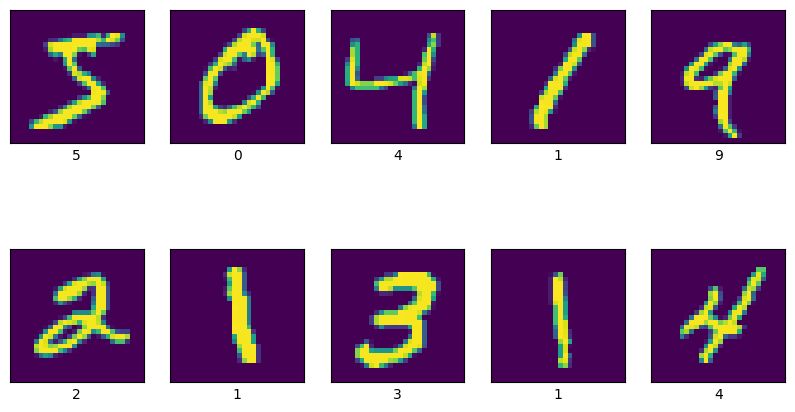

In [147]:
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_ann[i])
    plt.xlabel(y_train_ann[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [148]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    return np.maximum(0, Z)

  def softmax(self, Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

  def forward_propagation(self, X):
    A = X
    self.activations['A0'] = A

    for i in range(1, self.num_layers + 1):
      Z = self.weights_biases[f'W{i}'] @ A + self.weights_biases[f'b{i}']
      A = self.RELU(Z)
      self.activations[f'Z{i}'] = Z
      self.activations[f'A{i}'] = A

    Z_final = self.weights_biases[f'W{self.num_layers + 1}'] @ A + self.weights_biases[f'b{self.num_layers + 1}']
    A_final = self.softmax(Z_final)
    self.activations[f'Z{self.num_layers + 1}'] = Z_final
    self.activations[f'A{self.num_layers + 1}'] = A_final

    return A_final, self.activations

  def one_hot_encode(self, y):
    one_hot = np.zeros((self.output_size, y.size))
    one_hot[y, np.arange(y.size)] = 1
    return one_hot

  def total_loss(self, y_pred, Y):
    m = Y.shape[1]
    loss = -np.sum(Y * np.log(y_pred + 1e-8)) / m
    return loss

  def backward_prop(self, y_pred, Y):
    m = Y.shape[1]
    gradients = {}

    dZ = y_pred - Y
    gradients[f'dW{self.num_layers + 1}'] = (1/m) * dZ @ self.activations[f'A{self.num_layers}'].T
    gradients[f'db{self.num_layers + 1}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

    dA_prev = self.weights_biases[f'W{self.num_layers + 1}'].T @ dZ

    for i in reversed(range(1, self.num_layers + 1)):
      dZ = dA_prev * (self.activations[f'Z{i}'] > 0)
      gradients[f'dW{i}'] = (1/m) * dZ @ self.activations[f'A{i-1}'].T
      gradients[f'db{i}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
      if i > 1:
        dA_prev = self.weights_biases[f'W{i}'].T @ dZ

    return gradients

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):

    self.initial_params()
    Y = self.one_hot_encode(y)

    for i in range(1, num_iterations+1):
      y_pred, _ = self.forward_propagation(X)
      loss = self.total_loss(y_pred, Y)
      gradients = self.backward_prop(y_pred, Y)
      self.update_params(gradients)
      if i % 100 == 0:
        print(f"Iteration: {i}, Loss: {loss:.4f}")

  def predict(self, X):
      b = {}

      A,b = self.forward_propagation(X)
      predictions = np.argmax(A, axis=0)


      return predictions


In [149]:
model = ANN(input_size=784, output_size=10, learning_rate=0.1, num_layers=3, num_of_nodes_layers=64)
model.train(x_train_ann_reshaped, y_train_ann, num_iterations=4000)

Iteration: 100, Loss: 0.7241
Iteration: 200, Loss: 0.5074
Iteration: 300, Loss: 0.4108
Iteration: 400, Loss: 0.3532
Iteration: 500, Loss: 0.3141
Iteration: 600, Loss: 0.2853
Iteration: 700, Loss: 0.2630
Iteration: 800, Loss: 0.2450
Iteration: 900, Loss: 0.2300
Iteration: 1000, Loss: 0.2174
Iteration: 1100, Loss: 0.2065
Iteration: 1200, Loss: 0.1971
Iteration: 1300, Loss: 0.1888
Iteration: 1400, Loss: 0.1813
Iteration: 1500, Loss: 0.1747
Iteration: 1600, Loss: 0.1686
Iteration: 1700, Loss: 0.1630
Iteration: 1800, Loss: 0.1580
Iteration: 1900, Loss: 0.1533
Iteration: 2000, Loss: 0.1489
Iteration: 2100, Loss: 0.1447
Iteration: 2200, Loss: 0.1408
Iteration: 2300, Loss: 0.1371
Iteration: 2400, Loss: 0.1336
Iteration: 2500, Loss: 0.1303
Iteration: 2600, Loss: 0.1272
Iteration: 2700, Loss: 0.1242
Iteration: 2800, Loss: 0.1214
Iteration: 2900, Loss: 0.1187
Iteration: 3000, Loss: 0.1161
Iteration: 3100, Loss: 0.1137
Iteration: 3200, Loss: 0.1114
Iteration: 3300, Loss: 0.1091
Iteration: 3400, Lo

In [154]:
m = model.predict(x_test_ann_reshaped)
d = np.array(y_test_ann)
d = d.T
t=0
for i in range(len(m)):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 95.33 %


3


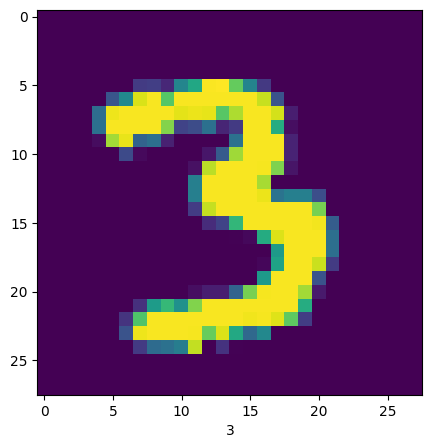

In [155]:

plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(x_test_ann[i])
plt.xlabel(m[i]);
